In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE, RandomOverSampler

RANDOM_STATE = 42

DATA_PATH = r"PATH\TO\YOUR\DATASET.csv"   # change
TARGET_COL = "target"                    # change


In [3]:
# ==========================================
# 1. Import the dataset
# ==========================================
# Change 'heart.csv' to the actual path of your local file
try:
    df = pd.read_csv(r"F:\11 semester Artificial intelligence nural network\11 lab trial 1 final\7. alzheimers_disease_data.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the file is in the project folder.")
  

Dataset loaded successfully.


In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid



Missing values (top 30):


PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryAlzheimers     0
CardiovascularDisease       0
Diabetes                    0
Depression                  0
HeadInjury                  0
Hypertension                0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
MMSE                        0
FunctionalAssessment        0
MemoryComplaints            0
BehavioralProblems          0
ADL                         0
Confusion                   0
Disorientation              0
dtype: int64

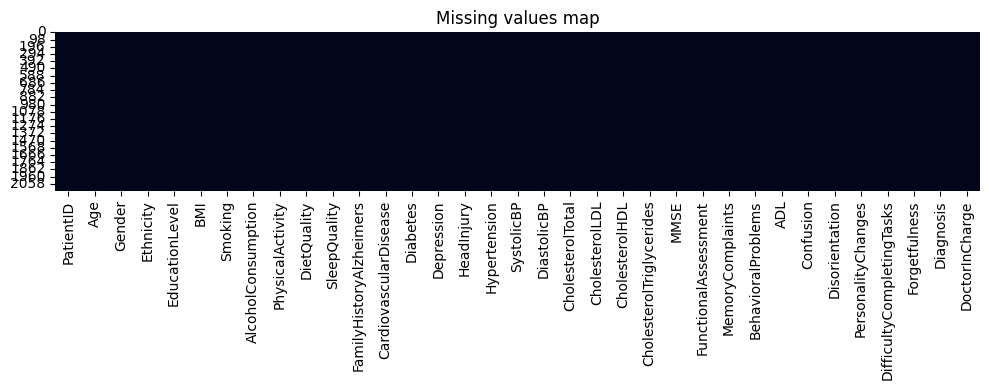

KeyError: 'target'

<Figure size 600x400 with 0 Axes>

In [5]:
print("\nMissing values (top 30):")
display(df.isna().sum().sort_values(ascending=False).head(30))

plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing values map")
plt.tight_layout()
plt.show()

# Target distribution
plt.figure(figsize=(6, 4))
df[TARGET_COL].value_counts(dropna=False).plot(kind="bar")
plt.title("Target distribution (raw)")
plt.xlabel(TARGET_COL)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Numeric histograms
numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols_all:
    df[numeric_cols_all[:12]].hist(figsize=(12, 8), bins=30)
    plt.suptitle("Numeric feature distributions (first 12 numeric cols)")
    plt.tight_layout()
    plt.show()

# Correlation heatmap (numeric)
if len(numeric_cols_all) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df[numeric_cols_all].corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation heatmap (numeric features)")
    plt.tight_layout()
    plt.show()


In [6]:
if TARGET_COL not in df.columns:
    raise ValueError(f"TARGET_COL='{TARGET_COL}' not found.")

X = df.drop(columns=[TARGET_COL])
y_raw = df[TARGET_COL].copy()

label_enc = LabelEncoder()
y = label_enc.fit_transform(y_raw.astype(str))

class_names = [str(c) for c in label_enc.classes_]
print("Classes:", class_names)
print("Mapping:", {c: i for i, c in enumerate(label_enc.classes_)})


ValueError: TARGET_COL='target' not found.